In [3]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.linalg
import os

In [5]:
# give it a file location which is in the format of a foam
# tensor interpolation series

# this will create a new deformation gradient series
# with no volumetric change (as this oscillates in Foam process lines)
# the step in the process line is broken down using matrix square roots
# until the deformation step magnitude is below a certain threshold


def smoothPath(file_loc,write_loc=None,threshold=1e-2):
    with open(file_loc,'r') as f:
        lines = f.readlines()
        
        defGradSeries = np.zeros((len(lines)-2,9))
        
        for idl,l in enumerate(lines[1:-1]):
            l = l.replace('(','').replace(')','')
            defGradSeries[idl,:] = l.split()[1:]
    
    defGradSeries_org = np.copy(defGradSeries)
    
    J = np.asarray([np.linalg.det(line.reshape(3,3)) for line in defGradSeries])
    F_dev = np.asarray([line*J[idx]**(-1/3.0) for idx,line in enumerate(defGradSeries)])
    
    
    defGradSeries_smoothed = []
    defGradSeries_smoothed.append(F_dev[0])
    
    last_one_ok = False
    for ids,F in enumerate(F_dev[1:]):
        Fold = F_dev[ids].reshape(3,3)
        Fnew = F.reshape(3,3)
        
        f = np.dot(Fnew,np.linalg.inv(Fold))
        #step_size = np.linalg.norm(Fold-Fnew)
        #step_size = np.linalg.norm(np.dot(f,f.T)-np.eye(3))
        step_size = np.max(np.abs(Fnew-Fold))
        
        if step_size <= threshold:
            defGradSeries_smoothed.append(F)
            continue
        else:
            
            extra_steps = 1
            while step_size > threshold:
                f = scipy.linalg.sqrtm(f)
                #step_size = np.linalg.norm(Fold - np.dot(f,Fold))
                #step_size = np.linalg.norm(np.dot(f,f.T)-np.eye(3))
                step_size = np.max(np.abs(Fold - np.dot(f,Fold)))
                extra_steps = extra_steps*2
                if extra_steps > 10000:
                    raise(Exception)
            
            Fextra = np.copy(Fold)
            for i in range(0,extra_steps):
                Fextra = np.dot(f,Fextra)
                defGradSeries_smoothed.append(np.linalg.det(Fextra)**(-1.0/3.0)*Fextra.reshape(9))
            
    defGradSeries_smoothed = np.real(np.asarray(defGradSeries_smoothed))
    
    if write_loc:
        with open(write_loc,'w') as f:
            f.write('(\n')
            for ids,l in enumerate(defGradSeries_smoothed):
                f.write('('+str(ids)+'    (' + ' '.join([str(x) for x in l]) + '))\n')
            f.write(')\n')
    return defGradSeries_org, defGradSeries_smoothed

In [155]:
org,smooth = smoothPath('./test_output/deformationPath_6.dat')

In [156]:
smooth

array([[ 9.99902558e-01,  4.41177277e-04,  4.15154248e-04, ...,
        -1.72567876e-03,  5.46118650e-06,  1.00001265e+00],
       [ 9.99939431e-01,  4.28040073e-04,  4.12669674e-04, ...,
        -1.88951386e-03,  2.40824914e-05,  1.00000067e+00],
       [ 9.99656715e-01,  4.28761395e-04,  3.95824558e-04, ...,
        -1.74590381e-03, -1.87455653e-05,  1.00011758e+00],
       ...,
       [ 1.43146842e+00,  4.36154775e-02,  2.35075949e-02, ...,
         4.92293484e-02,  3.26269758e-02,  9.80827267e-01],
       [ 1.43116915e+00,  4.40902673e-02,  2.39534982e-02, ...,
         4.99138514e-02,  3.34490019e-02,  9.80089165e-01],
       [ 1.43086960e+00,  4.45657840e-02,  2.43992849e-02, ...,
         5.05965055e-02,  3.42714391e-02,  9.79352420e-01]])

/home/mclancy/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


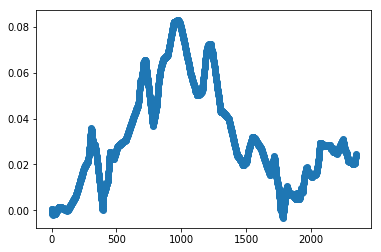

In [152]:
plt.plot(smooth[:,2],'o')


In [144]:
J = [np.linalg.det(F.reshape(3,3)) for F in smooth]

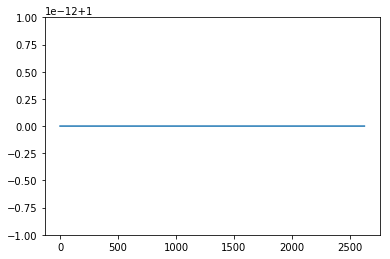

In [145]:
plt.plot(J)

In [7]:
# lets smooth some files
from glob import glob

files = glob('./drawing_appended_paths/deformationPath*')
output_loc = './drawing_smooth_paths/'

try:
    os.mkdir(output_loc)
except:
    pass

ids = 0
for f in files:
    print(f)
    smoothPath(f,write_loc=output_loc + str(ids)+'_deformation_path_smooth.dat')
    ids+=1

./drawing_appended_paths/deformationPath_6.dat
./drawing_appended_paths/deformationPath_57.dat
./drawing_appended_paths/deformationPath_61.dat
./drawing_appended_paths/deformationPath_39.dat
./drawing_appended_paths/deformationPath_71.dat
./drawing_appended_paths/deformationPath_74.dat
./drawing_appended_paths/deformationPath_27.dat
./drawing_appended_paths/deformationPath_32.dat
./drawing_appended_paths/deformationPath_34.dat
./drawing_appended_paths/deformationPath_13.dat
./drawing_appended_paths/deformationPath_43.dat
./drawing_appended_paths/deformationPath_8.dat
./drawing_appended_paths/deformationPath_15.dat
./drawing_appended_paths/deformationPath_60.dat
./drawing_appended_paths/deformationPath_56.dat
./drawing_appended_paths/deformationPath_47.dat
./drawing_appended_paths/deformationPath_40.dat
./drawing_appended_paths/deformationPath_5.dat
./drawing_appended_paths/deformationPath_65.dat
./drawing_appended_paths/deformationPath_20.dat
./drawing_appended_paths/deformationPath_70